# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation

In [2]:
# !pip install scikit_optimize
# !pip install lightgbm
# !pip install catboost
!pip install optuna
!pip install statsmodels

     |████████████████████████████████| 308 kB 5.0 MB/s 
     |████████████████████████████████| 210 kB 44.0 MB/s 
     |████████████████████████████████| 81 kB 8.0 MB/s 
     |████████████████████████████████| 78 kB 5.4 MB/s 
     |████████████████████████████████| 146 kB 51.2 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 112 kB 51.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=b784f860803c5aa63ddfbe1ab05ed2391f9eb09dc4783bfb9f8ecb7433666978
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


use kaleido to show plotly as image

In [3]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

# Imports

In [4]:
import numpy as np 
import pandas as pd 
import os
from os import listdir, getcwd, system
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *
import time
import timeit
from math import sqrt 
import gc
import json
from tqdm import tqdm
import logging
import sys
import pickle
import h5py # save the model

import joblib
# skopt.space.space

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# from Dash_converter import checkpoint, experiment

# preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFwe, f_regression, SelectKBest, SelectFdr, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# # text mining
# import nltk
# nltk.download('all-corpora', 'punkt', 'stopwords') # NLP - Download 'all-corpora' and 'punkt' from nltk
# from nltk.tokenize import sent_tokenize, word_tokenize, punkt
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# import re, string
# from sklearn.feature_extraction.text import TfidfVectorizer



# Models
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm

from sklearn.preprocessing import StandardScaler  #minmaxscaler (image data - here not known) #maxscaler
from sklearn.linear_model import MultiTaskLasso, PassiveAggressiveClassifier, LogisticRegression, SGDClassifier, Perceptron, LinearRegression, OrthogonalMatchingPursuit, ARDRegression, TweedieRegressor, SGDRegressor, Perceptron, PassiveAggressiveRegressor, HuberRegressor
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
from sklearn.svm import SVR, SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import multilabel_confusion_matrix, mean_squared_error, classification_report, explained_variance_score, r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, make_scorer, accuracy_score, confusion_matrix, average_precision_score, f1_score, precision_score, recall_score 
# regression
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
# decomposition
from sklearn.decomposition import PCA

# deeplearning
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import InceptionResNetV2, Xception, MobileNetV2, NASNetMobile, InceptionV3, EfficientNetV2S, EfficientNetV2M, EfficientNetV2L
from tensorflow import keras

from keras import optimizers
from keras.models import Model, Sequential, load_model
from keras.applications import vgg16
from keras import backend as K

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Input, GlobalAveragePooling2D, BatchNormalization
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMA

# image
from PIL import Image
import PIL
import matplotlib.image as mpimgC
from PIL import Image
import PIL
from skimage.io import imread, imshow
from skimage import io
import cv2 as cv
import kaleido

# Hyperparameter tuning
# from functools import partial
# from skopt.searchcv import BayesSearchCV
# from skopt import space 
# from skopt.space import Integer, Real, Categorical 
# from skopt.utils import use_named_args
# from skopt import gp_minimize
# import autosklearn.regression
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, STATUS_FAIL

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

#dropdown
import ipywidgets as widgets
import IPython
from IPython.display import Image
from IPython.core.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual

# To see multiple outputs from a cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 20) 

# Setup
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,5)



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Model

In [5]:
folder_OR2_models = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/models'
folder_OR2 = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II'
folder_OR2_data = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/data'

In [6]:
# folder_selected_model = 'complex_Models_vanilla_lstm_TPE/Optuna_Study_04_21_2022__11_52_49/Trial_23_cv_3_Model_04_21_2022__13_42_03/best_model.h5'
folder_selected = 'complex_Models_vanilla_lstm_TPE/Optuna_Study_04_22_2022__15_01_40/Trial_77_cv_2_Model_04_24_2022__11_31_41'

In [7]:
model_folder = os.path.join(folder_OR2_models,folder_selected, 'best_model.h5')
model_folder

'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/models/complex_Models_vanilla_lstm_TPE/Optuna_Study_04_22_2022__15_01_40/Trial_77_cv_2_Model_04_24_2022__11_31_41/best_model.h5'

In [8]:
model = load_model(model_folder)

In [9]:
f = open(os.path.join(folder_OR2_models,folder_selected,'MetaData.json'))
MetaData = json.load(f)
f.close()

In [10]:
with open(os.path.join(folder_OR2_models,folder_selected,'scaler.pkl'), 'rb') as f:
    scaler = pickle.load(f)

# Preprocessing

## Functions to use

In [11]:
def lstm_data_transform(x_data, y_data, num_steps=14):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array


In [12]:
def read_the_csv_file_from_data_folder (filename):
  df_r = pd.read_csv(os.path.join(folder_OR2_data,'{}.csv'.format(filename)))
  df_r = df_r.drop(['Unnamed: 0'], axis = 1)
  return df_r

In [13]:
def prepareTheData(X, num_laggs, Bool_Include_Country = True, Bool_Include_Date_Info = True, verbose=0 ):
  
  X_lstm = None
  y_lstm = None

  if verbose > 0:
      print('num_laggs', num_laggs)

  if Bool_Include_Country == True and Bool_Include_Date_Info == True:
    number_of_features = len(X.drop(['target_OrderQuantity'], axis=1).columns)
    X_lstm, y_lstm = lstm_data_transform(np.array(X.drop(['target_OrderQuantity'], axis=1)), np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_laggs)


  if Bool_Include_Country == True and Bool_Include_Date_Info == False:
    number_of_features = len(X.drop(['target_OrderQuantity', 'InvoiceDate_weekday_Num', 'InvoiceDate_week_Num',
       'InvoiceDate_month_Num', 'InvoiceDate_weekend_Bool',
       'InvoiceDate_holiday'], axis=1).columns)
    X_lstm, y_lstm = lstm_data_transform(np.array(X.drop(['target_OrderQuantity', 'InvoiceDate_weekday_Num', 'InvoiceDate_week_Num',
       'InvoiceDate_month_Num', 'InvoiceDate_weekend_Bool','InvoiceDate_holiday'], axis=1)), 
       np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_laggs)
  
  if Bool_Include_Country == False and Bool_Include_Date_Info == True:
    number_of_features = len(X[['Sum_OrderQuantity', 'Sum_ReturnBoolean', 'Sum_CustomerAmount','InvoiceDate_weekday_Num', 'InvoiceDate_week_Num',
       'InvoiceDate_month_Num', 'InvoiceDate_weekend_Bool','InvoiceDate_holiday']].columns)
    X_lstm, y_lstm = lstm_data_transform(np.array(X[['Sum_OrderQuantity', 'Sum_ReturnBoolean', 'Sum_CustomerAmount','InvoiceDate_weekday_Num', 'InvoiceDate_week_Num',
       'InvoiceDate_month_Num', 'InvoiceDate_weekend_Bool','InvoiceDate_holiday']]), np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_laggs)
    
  if Bool_Include_Country == False and Bool_Include_Date_Info == False:
    number_of_features = len(X[['Sum_OrderQuantity', 'Sum_ReturnBoolean', 'Sum_CustomerAmount']].columns)
    X_lstm, y_lstm = lstm_data_transform(np.array(X[['Sum_OrderQuantity', 'Sum_ReturnBoolean', 'Sum_CustomerAmount']]), np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_laggs)
    

  if verbose > 0:
    print ("The new shape of x is", X_lstm.shape)
    print("x1=samples x2=laggs x3=features")
    print("len_of_X_lstm:", len(X_lstm))

  return X_lstm, y_lstm, number_of_features


In [14]:
# - scaler   = the scaler object (it needs an inverse_transform method)
# - data     = the data to be inverse transformed as a Series, ndarray, ... 
#              (a 1d object you can assign to a df column)
# - ftName   = the name of the column to which the data belongs
# - colNames = all column names of the data on which scaler was fit 
#              (necessary because scaler will only accept a df of the same shape as the one it was fit on)
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

In [15]:

def c_rmse(y_true, y_pred):
  return sqrt(mean_absolute_error(y_true, y_pred))

def c_r2_score(y_true, y_pred):
  return r2_score(y_true, y_pred)

def c_max_error(y_true, y_pred):
  return max_error(y_true, y_pred)

def c_explained_variance_score(y_true, y_pred):
  return explained_variance_score(y_true, y_pred)

## Perform preprocessing

In [16]:
# set the MetaData
hpo_num_of_laggs = MetaData['hpo_num_of_laggs']
hpo_Bool_Include_Country = MetaData['hpo_Bool_Include_Country']
hpo_Bool_Include_Date_Info = MetaData['hpo_Bool_Include_Date_Info']

hpo_remove_training_outlier = False
hpo_feature_selection = False  
hpo_pca = False


In [17]:
# load the testdata
df_test_lstm = read_the_csv_file_from_data_folder('df_test_lstm')
df_test_lstm_time = df_test_lstm[:]
df_test_lstm_time['InvoiceDate'] = pd.to_datetime(df_test_lstm_time['InvoiceDate'])

# remove time 
df_test_lstm = df_test_lstm.drop(['InvoiceDate'], axis=1)

In [18]:
df_test_lstm = pd.DataFrame(scaler.transform(df_test_lstm),index=df_test_lstm.index, columns=df_test_lstm.columns)

In [19]:
X_test, y_test, num_of_features = prepareTheData(df_test_lstm, 
                                                              num_laggs = hpo_num_of_laggs, 
                                                              Bool_Include_Country = hpo_Bool_Include_Country, 
                                                              Bool_Include_Date_Info = hpo_Bool_Include_Date_Info,
                                                              verbose = 0,)


In [20]:
Y_test_predict = model.predict(X_test)

In [21]:
Y_test_predict_transformed = invTransform(scaler, Y_test_predict ,colName="target_OrderQuantity", colNames=df_test_lstm.columns )
y_test_transformed = invTransform(scaler, y_test ,colName="target_OrderQuantity", colNames=df_test_lstm.columns )


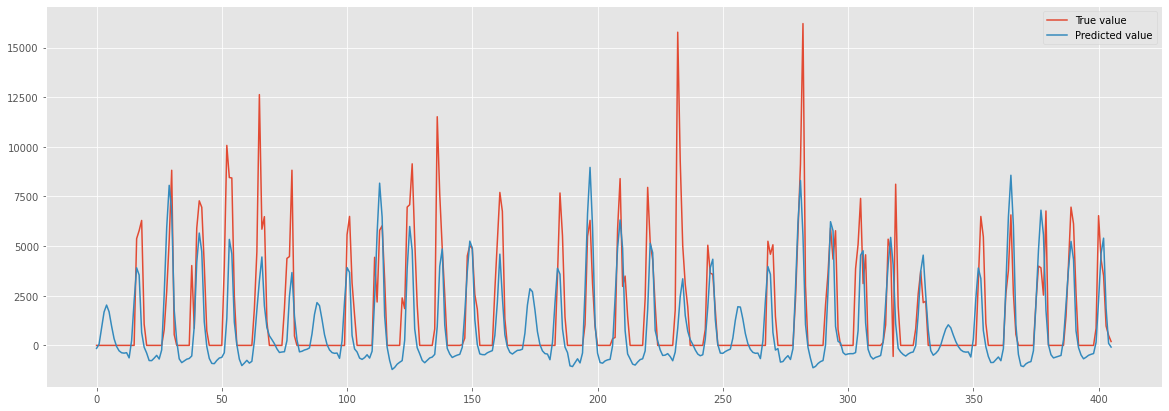

In [22]:

# valid data
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(y_test_transformed, label="True value")
plt.plot(Y_test_predict_transformed.ravel(), label="Predicted value")
plt.legend()
# plt.savefig(os.path.join(cv_i_folder,'Validation_And_ValidationPrediction.png'))
plt.show()
## save
plt.close()

In [23]:
# Compute Scores
score_rmse = c_rmse(y_test_transformed, Y_test_predict_transformed)
score_r2 = c_r2_score(y_test_transformed, Y_test_predict_transformed)
score_ess = c_explained_variance_score(y_test_transformed, Y_test_predict_transformed)
score_max_error = c_max_error(y_test_transformed, Y_test_predict_transformed)

print('RMSE: ', np.round(score_rmse,3))

RMSE:  35.617


# Confidence interval

https://medium.com/hal24k-techblog/how-to-generate-neural-network-confidence-intervals-with-keras-e4c0b78ebbdf

In [24]:
def create_dropout_predict_function(model, dropout):
    """
    Create a keras function to predict with dropout
    model : keras model
    dropout : fraction dropout to apply to all layers
    
    Returns
    predict_with_dropout : keras function for predicting with dropout
    """
    
    # Load the config of the original model
    conf = model.get_config()
    # Add the specified dropout to all layers
    for layer in conf['layers']:
        # Dropout layers
        if layer["class_name"]=="Dropout":
            layer["config"]["rate"] = dropout
        # Recurrent layers with dropout
        elif "dropout" in layer["config"].keys():
            layer["config"]["dropout"] = dropout

    # Create a new model with specified dropout
    if type(model)==Sequential:
        # Sequential
        model_dropout = Sequential.from_config(conf)
    else:
        # Functional
        model_dropout = Model.from_config(conf)
    model_dropout.set_weights(model.get_weights()) 
    
    # Create a function to predict with the dropout on
    predict_with_dropout = K.function(model_dropout.inputs+[K.learning_phase()], model_dropout.outputs)
    
    return predict_with_dropout

In [25]:
dropout = 0.5
num_iter = 20

In [26]:
# predict_with_dropout = create_dropout_predict_function(model, dropout)

In [27]:





# predictions = np.zeros((num_samples, num_iter))
# for i in range(num_iter):
#     predictions[:,i] = predict_with_dropout(input_data+[1])[0].reshape(-1)

In [28]:
# ci = 0.8
# lower_lim = np.quantile(predictions, 0.5-ci/2, axis=1)
# upper_lim = np.quantile(predictions, 0.5+ci/2, axis=1)

# Create CIs with Ensemle

In [29]:
# folder_selected_model = 'complex_Models_vanilla_lstm_TPE/Optuna_Study_04_21_2022__11_52_49/Trial_23_cv_3_Model_04_21_2022__13_42_03/best_model.h5'
folder_study = 'complex_Models_vanilla_lstm_TPE/Optuna_Study_04_22_2022__15_01_40/'

In [30]:
trial_selected = 'Trial_81'

In [31]:
Trial_Folders = []
for trial_cv in os.listdir(os.path.join(folder_OR2_models,folder_study)):
  if trial_cv.startswith(trial_selected):
    print(trial_cv)
    Trial_Folders.append(trial_cv)

Trial_81_cv_0_Model_04_24_2022__11_52_02
Trial_81_cv_1_Model_04_24_2022__11_53_26
Trial_81_cv_2_Model_04_24_2022__11_54_40
Trial_81_cv_3_Model_04_24_2022__11_56_01


In [32]:
Y_test_predict_cv_list = {}
for i, Trial_Folder in enumerate(Trial_Folders):
  model_folder = os.path.join(folder_OR2_models,folder_study,Trial_Folder, 'best_model.h5')
  
  # load the model
  model = load_model(model_folder)

  # load additional things
  f = open(os.path.join(folder_OR2_models,folder_study,Trial_Folder,'MetaData.json'))
  MetaData = json.load(f)
  f.close()

  with open(os.path.join(folder_OR2_models,folder_study,Trial_Folder,'scaler.pkl'), 'rb') as f:
    scaler = pickle.load(f)


  # set the MetaData (Hyperparameter)
  hpo_num_of_laggs = MetaData['hpo_num_of_laggs']
  hpo_Bool_Include_Country = MetaData['hpo_Bool_Include_Country']
  hpo_Bool_Include_Date_Info = MetaData['hpo_Bool_Include_Date_Info']

  hpo_remove_training_outlier = False
  hpo_feature_selection = False  
  hpo_pca = False

  # load the testdata
  df_test_lstm = read_the_csv_file_from_data_folder('df_test_lstm')
  df_test_lstm_time = df_test_lstm[:]
  df_test_lstm_time['InvoiceDate'] = pd.to_datetime(df_test_lstm_time['InvoiceDate'])


  # remove time 
  df_test_lstm = df_test_lstm.drop(['InvoiceDate'], axis=1)

  df_test_lstm = pd.DataFrame(scaler.transform(df_test_lstm),index=df_test_lstm.index, columns=df_test_lstm.columns)

  # create data
  X_test, y_test, num_of_features = prepareTheData(df_test_lstm, 
                                                              num_laggs = hpo_num_of_laggs, 
                                                              Bool_Include_Country = hpo_Bool_Include_Country, 
                                                              Bool_Include_Date_Info = hpo_Bool_Include_Date_Info,
                                                              verbose = 0,)

  Y_test_predict = model.predict(X_test)

  # reverse scaler
  Y_test_predict_transformed = invTransform(scaler, Y_test_predict ,colName="target_OrderQuantity", colNames=df_test_lstm.columns )
  y_test_transformed = invTransform(scaler, y_test ,colName="target_OrderQuantity", colNames=df_test_lstm.columns )

  if i == 0:
    Y_test_predict_cv_list['actual'] = y_test_transformed

  Y_test_predict_cv_list['CV_'+str(i)] = Y_test_predict_transformed

  # Compute Scores
  score_rmse = c_rmse(y_test_transformed, Y_test_predict_transformed)
  score_r2 = c_r2_score(y_test_transformed, Y_test_predict_transformed)
  score_ess = c_explained_variance_score(y_test_transformed, Y_test_predict_transformed)
  score_max_error = c_max_error(y_test_transformed, Y_test_predict_transformed)

  print('CV:',i,'RMSE: ', np.round(score_rmse,3))

CV: 0 RMSE:  33.315
CV: 1 RMSE:  32.91
CV: 2 RMSE:  33.722
CV: 3 RMSE:  32.375


In [33]:
Y_test_df =  pd.DataFrame(Y_test_predict_cv_list)

In [34]:
# 95% ci
Y_test_df['interval'] = [ 1.96 * np.array([CV_1, CV_2, CV_3, CV_4 ]).std() for CV_1, CV_2, CV_3, CV_4 in zip(Y_test_df.CV_0, Y_test_df.CV_1, Y_test_df.CV_2, Y_test_df.CV_3)]

In [35]:
# 90% ci
Y_test_df['interval_164'] = [ 1.64 * np.array([CV_1, CV_2, CV_3, CV_4 ]).std() for CV_1, CV_2, CV_3, CV_4 in zip(Y_test_df.CV_0, Y_test_df.CV_1, Y_test_df.CV_2, Y_test_df.CV_3)]

In [36]:
Y_test_df

,actual,CV_0,CV_1,CV_2,CV_3,interval,interval_164
0,0.0,-219.456272,-95.026276,-60.265818,-110.084541,116.681281,97.631276
1,0.0,-191.380544,124.504937,371.075319,-341.718011,542.325464,453.782531
2,0.0,23.025434,365.631214,1004.033797,-445.713494,1035.637646,866.553949
3,0.0,214.373298,586.513617,1479.751675,-517.953222,1410.359184,1180.096460
4,0.0,151.916544,546.078517,1461.729724,-557.663634,1429.347022,1195.984243
...,...,...,...,...,...,...,...
401,4326.0,3303.488325,3895.617072,3233.548741,5326.321014,1648.054677,1378.984525
402,3510.0,3121.184738,3276.762040,4719.425398,5669.798613,2066.448054,1729.068780
403,974.0,1440.221581,1201.504856,2053.693944,2762.475229,1184.839290,991.396141
404,506.0,760.846864,-47.623997,892.509708,997.141339,807.107362,675.334731


In [37]:
Y_test_df['mean'] = [ np.mean(np.array([CV_1, CV_2, CV_3, CV_4 ])) for CV_1, CV_2, CV_3, CV_4 in zip(Y_test_df.CV_0, Y_test_df.CV_1, Y_test_df.CV_2, Y_test_df.CV_3)]

In [38]:
Y_test_df

,actual,CV_0,CV_1,CV_2,CV_3,interval,interval_164,mean
0,0.0,-219.456272,-95.026276,-60.265818,-110.084541,116.681281,97.631276,-121.208227
1,0.0,-191.380544,124.504937,371.075319,-341.718011,542.325464,453.782531,-9.379575
2,0.0,23.025434,365.631214,1004.033797,-445.713494,1035.637646,866.553949,236.744237
3,0.0,214.373298,586.513617,1479.751675,-517.953222,1410.359184,1180.096460,440.671342
4,0.0,151.916544,546.078517,1461.729724,-557.663634,1429.347022,1195.984243,400.515288
...,...,...,...,...,...,...,...,...
401,4326.0,3303.488325,3895.617072,3233.548741,5326.321014,1648.054677,1378.984525,3939.743788
402,3510.0,3121.184738,3276.762040,4719.425398,5669.798613,2066.448054,1729.068780,4196.792697
403,974.0,1440.221581,1201.504856,2053.693944,2762.475229,1184.839290,991.396141,1864.473903
404,506.0,760.846864,-47.623997,892.509708,997.141339,807.107362,675.334731,650.718479


In [39]:
Y_test_df['lower'] = Y_test_df['mean'] - Y_test_df['interval'] 

In [40]:
Y_test_df['upper'] = Y_test_df['mean'] + Y_test_df['interval'] 

In [41]:
Y_test_df

,actual,CV_0,CV_1,CV_2,CV_3,interval,interval_164,mean,lower,upper
0,0.0,-219.456272,-95.026276,-60.265818,-110.084541,116.681281,97.631276,-121.208227,-237.889508,-4.526945
1,0.0,-191.380544,124.504937,371.075319,-341.718011,542.325464,453.782531,-9.379575,-551.705038,532.945889
2,0.0,23.025434,365.631214,1004.033797,-445.713494,1035.637646,866.553949,236.744237,-798.893409,1272.381884
3,0.0,214.373298,586.513617,1479.751675,-517.953222,1410.359184,1180.096460,440.671342,-969.687842,1851.030526
4,0.0,151.916544,546.078517,1461.729724,-557.663634,1429.347022,1195.984243,400.515288,-1028.831734,1829.862309
...,...,...,...,...,...,...,...,...,...,...
401,4326.0,3303.488325,3895.617072,3233.548741,5326.321014,1648.054677,1378.984525,3939.743788,2291.689111,5587.798465
402,3510.0,3121.184738,3276.762040,4719.425398,5669.798613,2066.448054,1729.068780,4196.792697,2130.344643,6263.240752
403,974.0,1440.221581,1201.504856,2053.693944,2762.475229,1184.839290,991.396141,1864.473903,679.634612,3049.313193
404,506.0,760.846864,-47.623997,892.509708,997.141339,807.107362,675.334731,650.718479,-156.388883,1457.825840


In [42]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(
#         y=Y_test_df['upper']+Y_test_df['lower'], # upper, then lower reversed
#         fill='toself',
#         fillcolor='rgba(255,199,199,50)',
#         line=dict(color='rgba(255,255,255,0)'),
#         hoverinfo="skip",
#         showlegend=False
#     ))
# fig.add_trace(go.Scatter(y=Y_test_df['actual'],
#                     mode='lines',
#                     name='Actual',
#                     line=dict(color='rgba(0,43,255,80)')
#                     ))

# fig.add_trace(go.Scatter(y=Y_test_df['mean'],
#                     mode='lines',
#                     name='Ensemble predicted <br>mean',
#                     line=dict(color='rgba(255,0,0,80)')))

# # fig.add_trace(go.Scatter(y=Y_test_df['upper'],
# #                     mode='lines',
# #                     name='Ensemble predicted <br>upper'))


# # fig.add_trace(go.Scatter(y=Y_test_df['lower'],
# #                     mode='lines',
# #                     name='Ensemble predicted <br>lower'))



# fig.show()

In [43]:
fig = go.Figure([
    go.Scatter(
        name='Ensemble predicted <br>mean',
        # x=df['Time'],
        y=Y_test_df['mean'],
        mode='lines',
        line=dict(color='rgb(255, 0, 0)'),
    ),
    go.Scatter(
        name='Upper Bound 1.96',
        # x=df['Time'],
        y=Y_test_df['mean']+Y_test_df['interval'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound 1.96',
        # x=df['Time'],
        y=Y_test_df['mean']-Y_test_df['interval'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ),
    

    go.Scatter(
        name='Upper Bound 0.92',
        # x=df['Time'],
        y=Y_test_df['mean']+Y_test_df['interval_164'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound 0.92',
        # x=df['Time'],
        y=Y_test_df['mean']-Y_test_df['interval_164'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.5)',
        fill='tonexty',
        showlegend=False
    ),



    go.Scatter(y=Y_test_df['actual'],
                    mode='lines',
                    name='Actual',
                    line=dict(color='rgba(0,43,255,80)')
                    )
])
fig.update_layout(
    yaxis_title='Orders',
    title='Test data with mean ensemble predictions(including)',
    hovermode="x"
)
fig.show()

https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/

In [44]:
# # calculate 95% gaussian prediction interval
# interval = 1.96 * yhat.std()
# lower, upper = yhat.mean() - interval, yhat.mean() + interval
# return lower, yhat.mean(), upper